<a href="https://colab.research.google.com/github/Swapnil-417/Online-Retail-Customer-Segmentation/blob/main/Final_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Customer Segmentation for Online Retail store. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transactional data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# visualization
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# models
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
# importing online retail dataset
file_path = "/content/drive/MyDrive/Capstone Projects/Online Retail Customer Segmentation/data/"
data = pd.read_excel(file_path + "Online Retail.xlsx")

In [4]:
# copying data
raw_data = data.copy()

# **Data Exploration**

In [5]:
# first look of data
raw_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
raw_data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [7]:
# shape
raw_data.shape

(541909, 8)

In [8]:
# basic info
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


The data contains information about transnational transactions for a UK-based and registered non-store online retail. THe dataset has 541909 rows(transactions) and 8 columns(attributes).

**Data** **Attributes**

**1. InvoiceNo**: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter ‘c’, it indicates a cancellation.

**2. StockCode**: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

**3. Description**: Product (item) name. Nominal.

**4. Quantity**: The quantities of each product (item) per transaction. Numeric.

**5. InvoiceDate**: Invoice Date and time. Numeric, the day and time when each transaction was generated.

**6. UnitPrice**: Unit price. Numeric, Product price per unit in sterling.

**7. CustomerID**: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

**8. Country**: Country name. Nominal, the name of the country where each customer resides.

## **Data Inspection**

In [9]:
# checking duplicate values
raw_data.duplicated().sum()

5268

In [10]:
raw_data[raw_data.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


In [11]:
# droping duplicate values
raw_data = raw_data.drop_duplicates()

In [12]:
raw_data.duplicated().sum()

0

### **Checking missing values**

In [13]:
# checking mising values
raw_data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

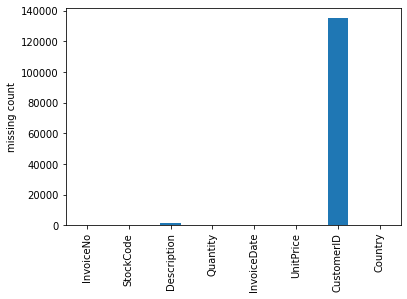

In [14]:
raw_data.isnull().sum().plot.bar()
plt.ylabel('missing count');

In [15]:
# looking at the missing values
raw_data[raw_data['CustomerID'].isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [16]:
# checking null values %
raw_data['CustomerID'].isnull().sum()*100/len(raw_data)

25.16337737891812

**Imputing missing CustomerID is not possible and our main task is of customer segmentation so we will drop missing CustomerID values which are around 25%.**

In [17]:
# droping missing values
raw_data = raw_data.dropna(subset=['CustomerID'],axis=0)
raw_data.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [18]:
raw_data.shape

(401604, 8)

In [19]:
# descriptive statistics
raw_data.describe()

,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


**We can see minimum value for Quantity is negative so we will explore the quantity column**

# **Exploratory Data Analysis**

### **Exploring columns**

### **Exploring Quantity**

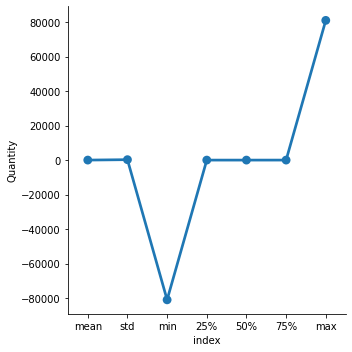

In [20]:
# descriptive statistics plot
describe_qnty = raw_data["Quantity"].describe().reset_index()
describe_qnty = describe_qnty[describe_qnty['index'] != 'count']
sns.factorplot(x='index', y='Quantity', data=describe_qnty)
plt.show()

**We can see minimum value for quantity is negative**

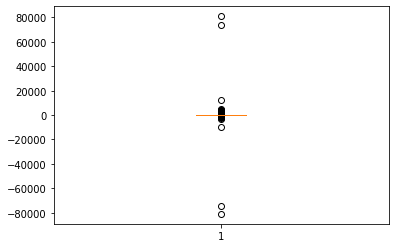

In [21]:
# boxplot
plt.boxplot(raw_data['Quantity']);

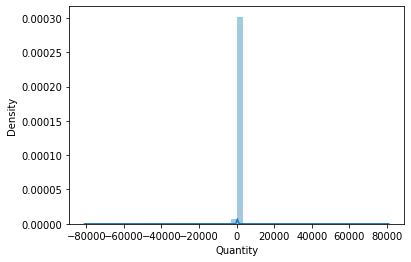

In [22]:
# distribution plot
sns.distplot(raw_data['Quantity']);

In [23]:
# checking minimum value
raw_data[raw_data['Quantity'] == -80995]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom


**This type of transactions are of cancelled orders and we saw in description this transactions have C at starting of InvoiceNo. We will see more out of it**

In [24]:
# InvoiceNo starting with C
raw_data[raw_data['InvoiceNo'].astype(str).str.contains('C')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [25]:
cancelled_df= raw_data[raw_data['InvoiceNo'].astype(str).str.contains('C')]

In [26]:
cancelled_df[cancelled_df['Quantity']>0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


**We can see Quantity is less than 0 for all InvoiceNo starting with C as we expected this are the cancelled orders**

In [27]:
cancelled_df.shape

(8872, 8)

**There are 8872 cancelled orders in our dataset which are huge**

### **Exploring UnitPrice**

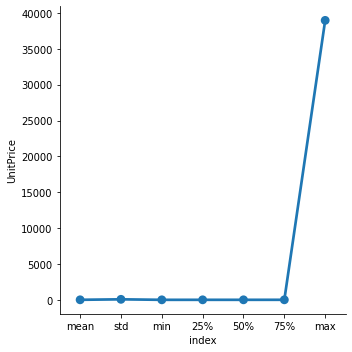

In [28]:
# descriptive statistics plot
describe_unitprice = raw_data["UnitPrice"].describe().reset_index()
describe_unitprice = describe_unitprice[describe_unitprice['index'] != 'count']
sns.factorplot(x='index', y='UnitPrice', data=describe_unitprice)
plt.show()

In [29]:
len(raw_data[raw_data['UnitPrice']==0.0])

40

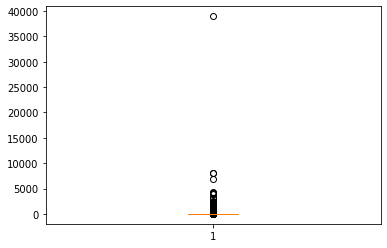

In [30]:
# boxplot
plt.boxplot(raw_data['UnitPrice']);

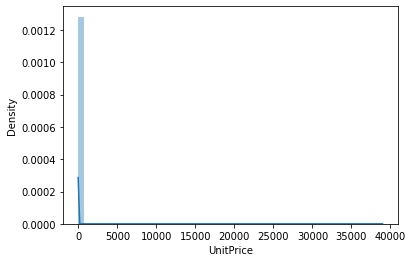

In [31]:
# distribution
sns.distplot(raw_data['UnitPrice']);

In [32]:
# transaction with max price
raw_data[raw_data['UnitPrice']==raw_data['UnitPrice'].max()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
222681,C556445,M,Manual,-1,2011-06-10 15:31:00,38970.0,15098.0,United Kingdom


**The order with max unitprice is a cancelled order**

### **Exploring CustomerID and InvoiceNo**

In [33]:
# number of customers in total
len(raw_data['CustomerID'].value_counts())

4372

In [34]:
# number of transactions
len(raw_data['InvoiceNo'].value_counts())

22190

**4372 customer records are present in the dataset having 22190 orders in total.**

In [35]:
cmr_df= raw_data['CustomerID'].value_counts()

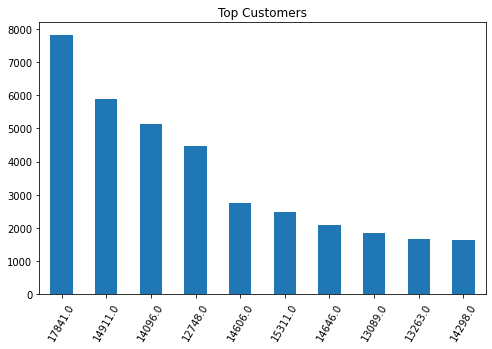

In [36]:
# top customers 
plt.figure(figsize=(8,5))
cmr_df.head(10).plot.bar()
plt.title('Top Customers')
plt.xticks(rotation=60);

**These are the top customers of the retail store and 17841 CustomerID has most number of transactions 7500+. This customer must be the wholesale customer of the store.**

In [37]:
# top customer
raw_data[raw_data['CustomerID']==17841.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1441,C536543,22632,HAND WARMER RED RETROSPOT,-1,2010-12-01 14:30:00,2.10,17841.0,United Kingdom
1442,C536543,22355,CHARLOTTE BAG SUKI DESIGN,-2,2010-12-01 14:30:00,0.85,17841.0,United Kingdom
2037,536557,21495,SKULLS AND CROSSBONES WRAP,25,2010-12-01 14:41:00,0.42,17841.0,United Kingdom
2038,536557,46000R,POLYESTER FILLER PAD 45x30cm,2,2010-12-01 14:41:00,1.45,17841.0,United Kingdom
2039,536557,46000S,POLYESTER FILLER PAD 40x40cm,1,2010-12-01 14:41:00,1.45,17841.0,United Kingdom
...,...,...,...,...,...,...,...,...
537748,581334,22077,6 RIBBONS RUSTIC CHARM,1,2011-12-08 12:07:00,1.95,17841.0,United Kingdom
537749,581334,23399,HOME SWEET HOME HANGING HEART,3,2011-12-08 12:07:00,0.85,17841.0,United Kingdom
537750,581334,22893,MINI CAKE STAND T-LIGHT HOLDER,12,2011-12-08 12:07:00,0.42,17841.0,United Kingdom
537751,581334,22371,AIRLINE BAG VINTAGE TOKYO 78,1,2011-12-08 12:07:00,4.25,17841.0,United Kingdom


### **Examining StockCode and their Description**

In [38]:
# total number of products
raw_data['StockCode'].nunique()

3684

**There are 3684 products in the dataset.**

In [39]:
# number of unique item descriptions
raw_data['Description'].nunique()

3896

**The number of products and the number of descriptions do not match. We can say that some of the products might have more than one descriptions.**

In [40]:
# stockcodes having more than one descriptions
stock_df= raw_data.groupby(["StockCode","Description"]).count().reset_index()['StockCode'].value_counts()
stock_df.head()

23236    4
23196    4
23366    3
23203    3
22937    3
Name: StockCode, dtype: int64

**These are the top StockCodes with more than one description. Since our objective is Customer Segmentation this will not any impact on our analysis so we will neglect this.**

### **Exploring Country column**

In [41]:
# number of countrys
country_cnt = raw_data['Country'].value_counts()
len(country_cnt)

37

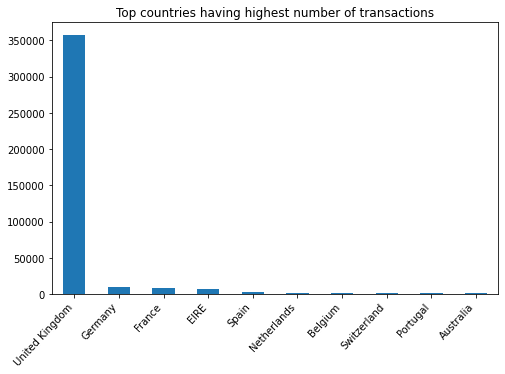

In [42]:
# top countries having highest number of transactions
plt.figure(figsize=(8,5))
country_cnt.head(10).plot.bar()
plt.title('Top countries having highest number of transactions');
plt.xticks(rotation=47, ha="right")
plt.show()

**The above graph shows the number of transactions from the top 10 countries. This shows that around 90% of orders are coming from United Kingdom.**

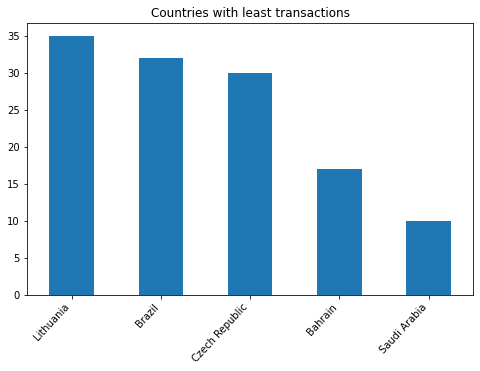

In [43]:
# countries with least transactions
plt.figure(figsize=(8,5))
country_cnt.tail().plot.bar()
plt.title('Countries with least transactions')
plt.xticks(rotation=47, ha="right")
plt.show()

Countries with least transactions:
1. Lithuania
2. Brazil
3. Czech Republic
4. Bahrain
5. Saudi Arabia

In [44]:
# checking transaction % in UK
tr_uk = round(len(raw_data[raw_data['Country']=='United Kingdom']) / len(raw_data) * 100,2)
print(f"{tr_uk}% transactions are from United Kingdom.")

88.83% transactions are from United Kingdom.


## **Data Insights**

### **What is the average quantity customers purchase per order?**

In [45]:
# extract the date from datetime
def extract_date(datetime_obj):
  return datetime_obj.date()

In [46]:
# assigning date column
raw_data['date'] = raw_data['InvoiceDate'].apply(extract_date)

In [47]:
raw_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01


In [48]:
qtywise_ctr= raw_data.groupby(['CustomerID','date'])['Quantity'].sum().reset_index()
qtywise_ctr.sort_values(by='Quantity', ascending=False).head()

,CustomerID,date,Quantity
16609,17450.0,2011-09-20,25930
7948,14646.0,2011-10-20,18140
181,12415.0,2011-06-15,15241
14210,16684.0,2011-10-05,14808
7937,14646.0,2011-08-11,14730


**These are the top customers who purchased maximum quantity per order.**

In [49]:
qtywise_ctr['Quantity'].describe()

count    19296.000000
mean       253.568149
std        623.090066
min      -9360.000000
25%         52.000000
50%        140.000000
75%        276.250000
max      25930.000000
Name: Quantity, dtype: float64

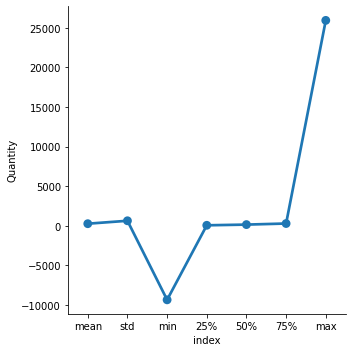

In [50]:
# descriptive statistics plot
describe_qnty_df = qtywise_ctr.describe()
describe_qnty_df.reset_index(inplace=True)
describe_qnty_df = describe_qnty_df[describe_qnty_df['index'] != 'count']
sns.factorplot(x='index', y='Quantity', data=describe_qnty_df)
plt.show()

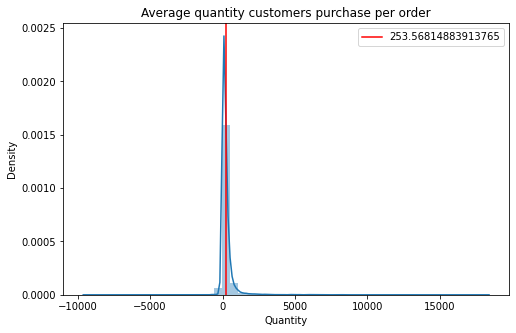

In [51]:
# Average quantity customers purchase per order
data3= qtywise_ctr[qtywise_ctr['Quantity']<25930.0]
plt.figure(figsize=(8,5))
sns.distplot(data3['Quantity'])
plt.xlabel("Quantity")
xmean=qtywise_ctr['Quantity'].mean()
plt.axvline(x=xmean, color='red', label= xmean)
plt.legend()
plt.title("Average quantity customers purchase per order");

**The average quantity purchased by the customers per order is around 250.**



### **What is the average number of orders per customer?**

In [52]:
# average quantity
avg_qnty= qtywise_ctr.groupby(['CustomerID'],as_index=False).agg({'Quantity':'mean'}).rename(columns={'Quantity':'qnty/order'})
orders_df= qtywise_ctr['CustomerID'].value_counts().reset_index().rename(columns={'index':'CustomerID', 'CustomerID':'orders'}).sort_values(by='CustomerID')
avg_qnty= avg_qnty.merge(orders_df)
avg_qnty.head()

,CustomerID,qnty/order,orders
0,12346.0,0.000000,1
1,12347.0,351.142857,7
2,12348.0,585.250000,4
3,12349.0,631.000000,1
4,12350.0,197.000000,1


We are looking at the average quantity purchased by the customers but we can see there are some single orders and average quantity also showing 0.

In [53]:
avg_qnty['orders'].describe()

count    4372.000000
mean        4.413541
std         6.674343
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       146.000000
Name: orders, dtype: float64

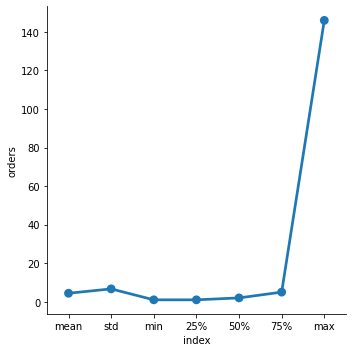

In [54]:
describe_orders_df = avg_qnty.describe()
describe_orders_df.reset_index(inplace=True)
describe_orders_df = describe_orders_df[describe_orders_df['index'] != 'count']
sns.factorplot(x='index', y='orders', data=describe_orders_df)
plt.show()

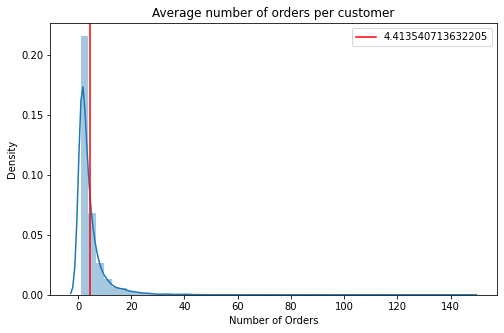

In [55]:
# Average number of orders per customer
plt.figure(figsize=(8,5))
sns.distplot(avg_qnty['orders'])
plt.xlabel("Number of Orders")
xmean=avg_qnty['orders'].mean()
plt.axvline(x=xmean, color='red', label= xmean)
plt.legend()
plt.title("Average number of orders per customer");

**Customers have placed orders 4 or 5 times on average and maximum number of orders being 146 from a single customer.**

### **Top customers buying maximum quantity**

In [56]:
# filtering based on orders above 5 and Quantity greater than 0
filtered_avg_qnty = avg_qnty[(avg_qnty['orders']>=5) & (avg_qnty['qnty/order']>0)]
filtered_avg_qnty.head()

,CustomerID,qnty/order,orders
1,12347.0,351.142857,7
5,12352.0,67.142857,7
12,12359.0,266.500000,6
15,12362.0,170.153846,13
29,12380.0,225.200000,5


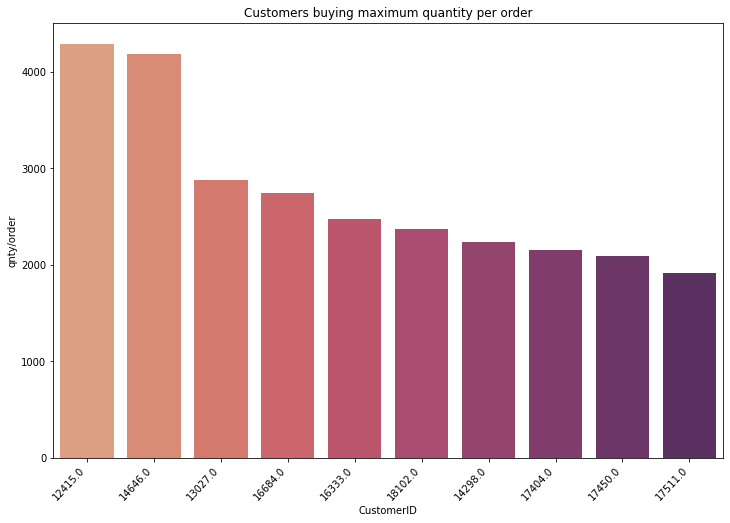

In [57]:
# Customers buying maximum quantity on average per order
data1= filtered_avg_qnty.sort_values(by='qnty/order',ascending=False).head(10)

# plot
fig, ax = plt.subplots(figsize=(12,8))
ax=sns.barplot(x='CustomerID', y='qnty/order', data= data1, order=data1['CustomerID'], palette='flare')
ax.set_title('Customers buying maximum quantity per order')
ax.set_xticklabels(ax.get_xticklabels(), rotation=47, ha="right")
plt.show()

**These are the customers buying maximum average quantity per order. These could be the wholesalers who buy in bulk.**

### **Top customers with highest number of orders**

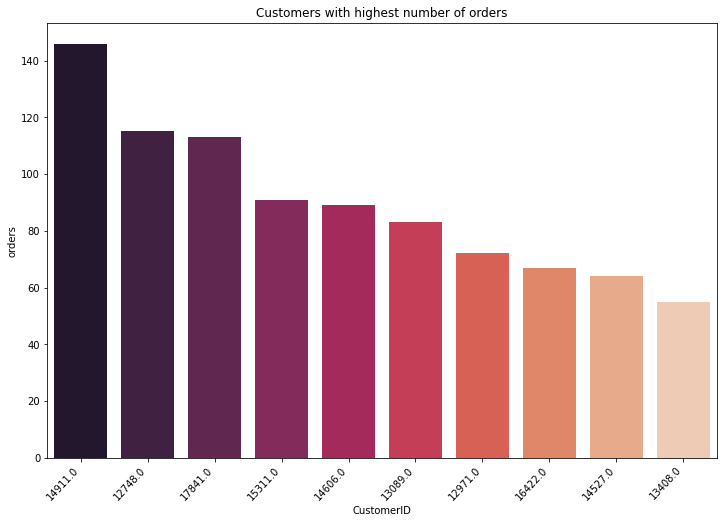

In [58]:
# Customers with highest number of orders
data2= filtered_avg_qnty.sort_values(by='orders',ascending=False).head(10)

fig, ax = plt.subplots(figsize=(12,8))
ax=sns.barplot(x='CustomerID', y='orders', data= data2, order=data2['CustomerID'], palette='rocket')
ax.set_title('Customers with highest number of orders')
ax.set_xticklabels(ax.get_xticklabels(), rotation=47, ha="right")
plt.show()

**These are the customers who have maximum orders**

### **Which Country has most customers?**

In [59]:
cmr_cty_df= raw_data.groupby('Country')['CustomerID'].nunique().sort_values(ascending=False)
cmr_cty_df= cmr_cty_df.reset_index().rename(columns={'CustomerID':'Number_of_Customers'})
cmr_cty_df.head()

,Country,Number_of_Customers
0,United Kingdom,3950
1,Germany,95
2,France,87
3,Spain,31
4,Belgium,25


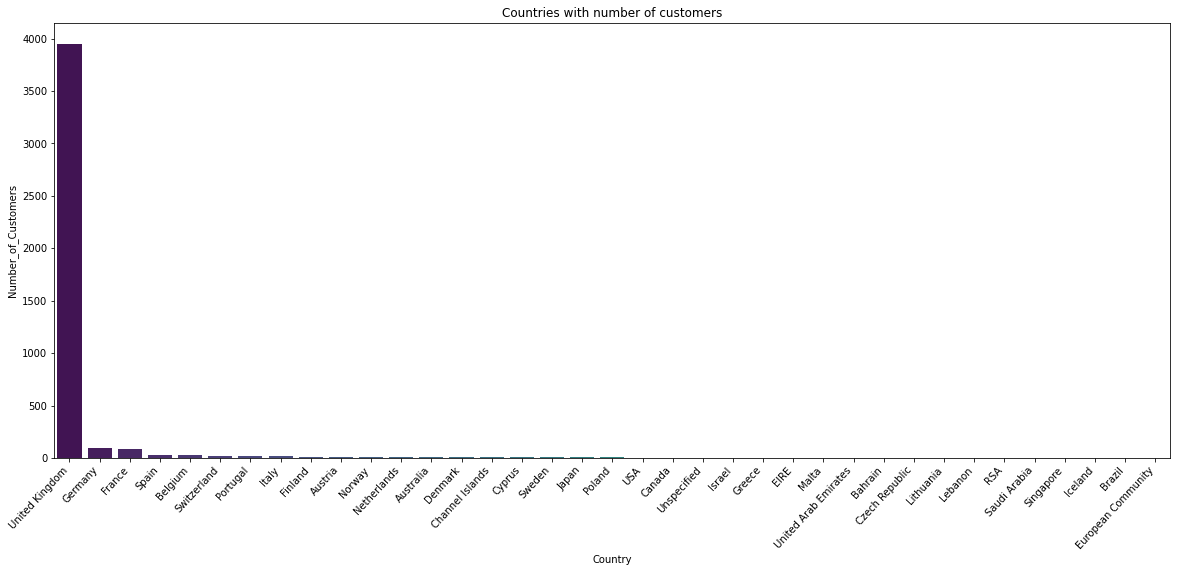

In [60]:
fig, ax = plt.subplots(figsize=(20,8))
ax=sns.barplot(x='Country', y='Number_of_Customers',data=cmr_cty_df,ax=ax, palette='viridis')
ax.set_xticklabels(ax.get_xticklabels(), rotation=47, ha="right")
ax.set_title('Countries with number of customers')
plt.show()

**Not only maximum transactions come from the UK but also most customers are located in the United Kingdom.**

# **Data Preprocessing**

**We will consider only United Kingdom retail data for maximum impact and not to form clustering on geographical conditions.**

In [61]:
# filtering only United Kingdom customers data
ukretail_df= raw_data[raw_data['Country'] == 'United Kingdom']

**We saw before there were cancelled orders present in the dataset.So, filtering cancelled orders also.**

In [62]:
# filtering cancelled orders
ukretail_df= ukretail_df[ukretail_df['Quantity']>0]

**Creating total cost column**

In [63]:
# total cost
ukretail_df['total_cost'] = ukretail_df["Quantity"] * ukretail_df["UnitPrice"]

In [64]:
# checking dates
print(f"first date: {ukretail_df['date'].min()}")
print(f"latest date: {ukretail_df['date'].max()}")

first date: 2010-12-01
latest date: 2011-12-09


In [65]:
ukretail_df.shape

(349227, 10)

In [66]:
ukretail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,total_cost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34


In [67]:
ukretail_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349227 entries, 0 to 541893
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    349227 non-null  object        
 1   StockCode    349227 non-null  object        
 2   Description  349227 non-null  object        
 3   Quantity     349227 non-null  int64         
 4   InvoiceDate  349227 non-null  datetime64[ns]
 5   UnitPrice    349227 non-null  float64       
 6   CustomerID   349227 non-null  float64       
 7   Country      349227 non-null  object        
 8   date         349227 non-null  object        
 9   total_cost   349227 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 29.3+ MB


# **RFM Analysis**

## **Recency**
To calculate recency, We will fix a reference date for finding the recent transactions. The reference date would be a day after the most recent transaction date in the dataset. Then we will calculate the days difference between the most recent transaction carried out by the customer and this reference date.

**Setting reference date as 2011-12-10 as last date of transaction in our dataset is 2011-12-09**

In [68]:
# setting reference date as 2011-12-10
ref_date= dt.date(2011,12,10)

In [69]:
# checking recent purchase date
recency_df = ukretail_df.groupby("CustomerID")['date'].max().reset_index()
recency_df = recency_df.rename(columns={'date':'recent_purchase'})
recency_df.head()

,CustomerID,recent_purchase
0,12346.0,2011-01-18
1,12747.0,2011-12-07
2,12748.0,2011-12-09
3,12749.0,2011-12-06
4,12820.0,2011-12-06


we can see this are the last date of purchase of the customers

In [70]:
# calculate recency
recency_df['Recency'] = recency_df['recent_purchase'].apply(lambda x: (ref_date - x).days)

In [71]:
recency_df.head()

,CustomerID,recent_purchase,Recency
0,12346.0,2011-01-18,326
1,12747.0,2011-12-07,3
2,12748.0,2011-12-09,1
3,12749.0,2011-12-06,4
4,12820.0,2011-12-06,4


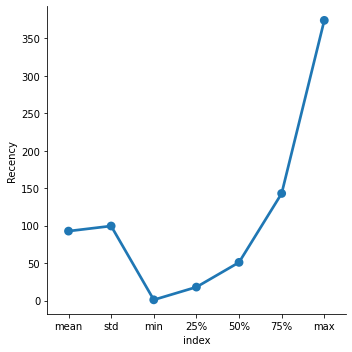

In [72]:
# Descriptive Statistics of Recency
describe_recency = recency_df.describe()
describe_recency.reset_index(inplace=True)
describe_recency = describe_recency[describe_recency['index'] != 'count']
sns.factorplot(x='index', y='Recency', data=describe_recency)
plt.show()

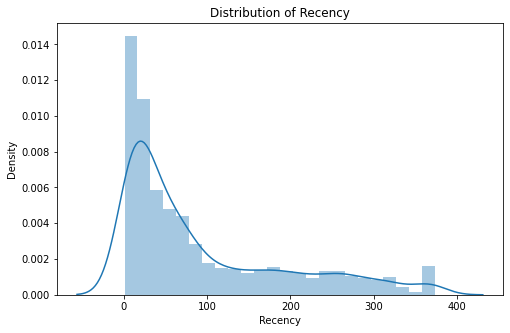

In [73]:
# Distribution of Recency
plt.figure(figsize=(8,5))
sns.distplot(recency_df['Recency'])
plt.title("Distribution of Recency");

**We can see that there are more customers who have purchased recently and the graph decrease furthur.**

## **Frequency**

Frequency will helps us to know how many times a customer has purchased.

In [74]:
frequency_df = ukretail_df.groupby('CustomerID').agg({'InvoiceNo': 'count'}).reset_index()
frequency_df.rename(columns={'InvoiceNo': 'Frequency'}, inplace= True)
frequency_df.head()

,CustomerID,Frequency
0,12346.0,1
1,12747.0,103
2,12748.0,4413
3,12749.0,199
4,12820.0,59


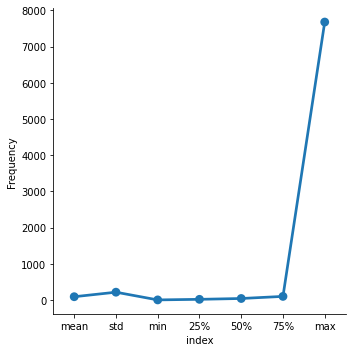

In [75]:
# Descriptive Statistics of frequency
describe_frequency = frequency_df.describe()
describe_frequency.reset_index(inplace=True)
describe_frequency = describe_frequency[describe_frequency['index'] != 'count']
sns.factorplot(x='index', y='Frequency', data=describe_frequency)
plt.show()

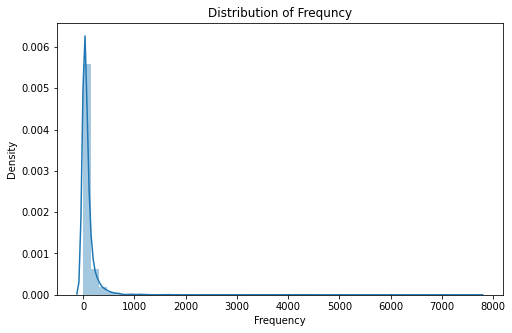

In [76]:
# Distribution of Frequncy
plt.figure(figsize=(8,5))
sns.distplot(frequency_df['Frequency'])
plt.title("Distribution of Frequncy");

**The distribution of frequency is skewed.**

## **Monetary**

In [77]:
monetary_df = ukretail_df.groupby('CustomerID').agg({'total_cost': 'sum'}).reset_index()
monetary_df.rename(columns={'total_cost': 'Monetary'}, inplace= True)
monetary_df.head()

,CustomerID,Monetary
0,12346.0,77183.60
1,12747.0,4196.01
2,12748.0,33053.19
3,12749.0,4090.88
4,12820.0,942.34


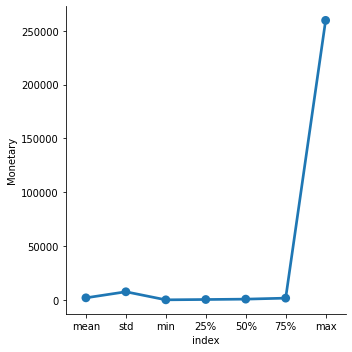

In [78]:
# Descriptive Statistics of monetary
describe_monetary = monetary_df.describe()
describe_monetary.reset_index(inplace=True)
describe_monetary = describe_monetary[describe_monetary['index'] != 'count']
sns.factorplot(x='index', y='Monetary', data=describe_monetary)
plt.show()

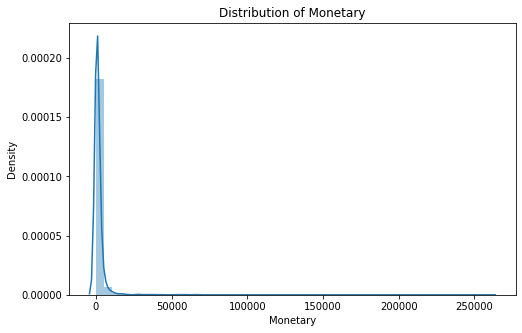

In [79]:
# Distribution of Monetary
plt.figure(figsize=(8,5))
sns.distplot(monetary_df['Monetary'])
plt.title("Distribution of Monetary");

**The distribution of Monetary value is also skewed.**

### **Combining Recency, Frequency and Monetary**

In [80]:
# combining Recency, Frequency and Monetary
rfm_df= recency_df.merge(frequency_df, how="outer")
rfm_df= rfm_df.merge(monetary_df, how="outer")
rfm_df.drop("recent_purchase", axis=1, inplace=True)
rfm_df.set_index("CustomerID", inplace=True)

In [81]:
rfm_df.head(10)

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12747.0,3,103,4196.01
12748.0,1,4413,33053.19
12749.0,4,199,4090.88
12820.0,4,59,942.34
12821.0,215,6,92.72
12822.0,71,46,948.88
12823.0,75,5,1759.50
12824.0,60,25,397.12


In [82]:
rfm_df.describe()

,Recency,Frequency,Monetary
count,3921.000000,3921.000000,3921.000000
mean,92.722265,89.065800,1857.950687
std,99.528532,214.022733,7477.736186
min,1.000000,1.000000,0.000000
25%,18.000000,17.000000,298.110000
50%,51.000000,40.000000,644.300000
75%,143.000000,98.000000,1570.810000
max,374.000000,7676.000000,259657.300000


We can see the minimum monetary value is 0 and it do not make sense to us so will remove the rows with 0 monetary value

In [83]:
rfm_df= rfm_df[rfm_df['Monetary'] > 0]

**We will assign the score from 1 to 4 on the basis of recency, frequency and monetary based on there quartiles.** 

4 being the best score and 1 being the worst score. A final score will be calculated simply by combining individual RFM scores.

In [84]:
# quartiles
quartiles= rfm_df.quantile(q=[0.25,0.5,0.75])
quartiles

,Recency,Frequency,Monetary
0.25,18.0,17.0,298.185
0.50,51.0,40.0,644.975
0.75,143.0,98.0,1571.285


Higher recency is bad so it will get the lesser score but in case of frequency and monetary higher values are good so they will get higher scores.

**Creating functions to rate the Recency, Frequency and Monetary based on 1 to 4.**

In [85]:
#Functions to create R, F and M segments
def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
    
def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [86]:
#Calculating R, F and M segment value and adding into existing dataset
rfm_df['R'] = rfm_df['Recency'].apply(RScoring, args=('Recency',quartiles,))
rfm_df['F'] = rfm_df['Frequency'].apply(FnMScoring, args=('Frequency',quartiles,))
rfm_df['M'] = rfm_df['Monetary'].apply(FnMScoring, args=('Monetary',quartiles,))

In [87]:
rfm_df.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346.0,326,1,77183.60,1,1,4
12747.0,3,103,4196.01,4,4,4
12748.0,1,4413,33053.19,4,4,4
12749.0,4,199,4090.88,4,4,4
12820.0,4,59,942.34,4,3,3


We can see best recency i.e customer with most recently purchase has R=4 score and same is with Frequency and Monetary

Next, we will combine the scores to create a single rfm score

In [88]:
# Concatenating RFM
rfm_df['RFM_Segment'] = rfm_df['R'].map(str) + rfm_df['F'].map(str) + rfm_df['M'].map(str)

#Calculating RFMScore 
rfm_df['RFM_score'] = rfm_df[['R', 'F', 'M']].sum(axis = 1)
rfm_df.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_score
CustomerID,,,,,,,,
12346.0,326,1,77183.60,1,1,4,114,6
12747.0,3,103,4196.01,4,4,4,444,12
12748.0,1,4413,33053.19,4,4,4,444,12
12749.0,4,199,4090.88,4,4,4,444,12
12820.0,4,59,942.34,4,3,3,433,10


**The RFMScore of 12 will show us the best customers of the retail store.**

In [89]:
rfm_df[rfm_df['RFM_score']==12]

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_score
CustomerID,,,,,,,,
12747.0,3,103,4196.01,4,4,4,444,12
12748.0,1,4413,33053.19,4,4,4,444,12
12749.0,4,199,4090.88,4,4,4,444,12
12839.0,3,314,5591.42,4,4,4,444,12
12841.0,5,414,3991.58,4,4,4,444,12
...,...,...,...,...,...,...,...,...
18229.0,12,164,7276.90,4,4,4,444,12
18241.0,10,104,2073.09,4,4,4,444,12
18245.0,8,175,2567.06,4,4,4,444,12


There are 407 customers who had purchased recently, most frequently and also spend most.

**Analyzing RFM score distribution and segmenting them manually as High value, average value and Low value customers**

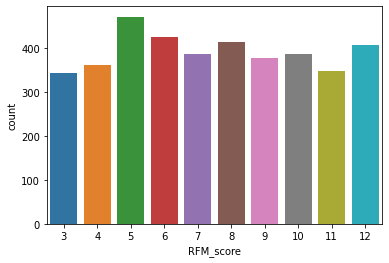

In [90]:
sns.countplot(rfm_df["RFM_score"]);

In [91]:
def create_segments(df):
    if df['RFM_score'] >= 9:
        return 'High'
    elif (df['RFM_score'] >= 5) and (df['RFM_score'] < 9):
        return 'Average'
    else:
        return 'Low'

In [92]:
rfm_df['Segment'] = rfm_df.apply(create_segments, axis=1)
rfm_df.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_score,Segment
CustomerID,,,,,,,,,
12346.0,326,1,77183.60,1,1,4,114,6,Average
12747.0,3,103,4196.01,4,4,4,444,12,High
12748.0,1,4413,33053.19,4,4,4,444,12,High
12749.0,4,199,4090.88,4,4,4,444,12,High
12820.0,4,59,942.34,4,3,3,433,10,High


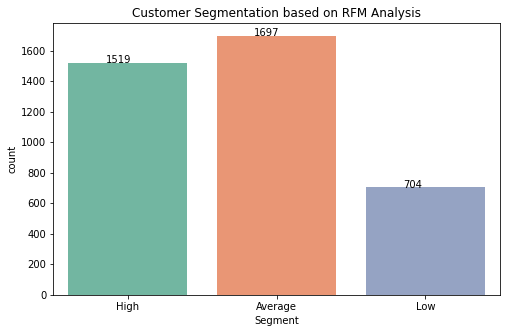

In [93]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x=rfm_df["Segment"], palette = "Set2",
                   order=['High','Average','Low'])

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.title("Customer Segmentation based on RFM Analysis")
plt.show()

**From this RFM analysis we segmented the customers into three clusters as High, Average and Low value customers based on the RFM score.**

**Next, we will use K-means clustering to practically find out the optimal number of clusters.**

## **Data Processing**

In [94]:
rfm_data = rfm_df[["Recency", "Frequency", "Monetary"]]
rfm_data.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12747.0,3,103,4196.01
12748.0,1,4413,33053.19
12749.0,4,199,4090.88
12820.0,4,59,942.34


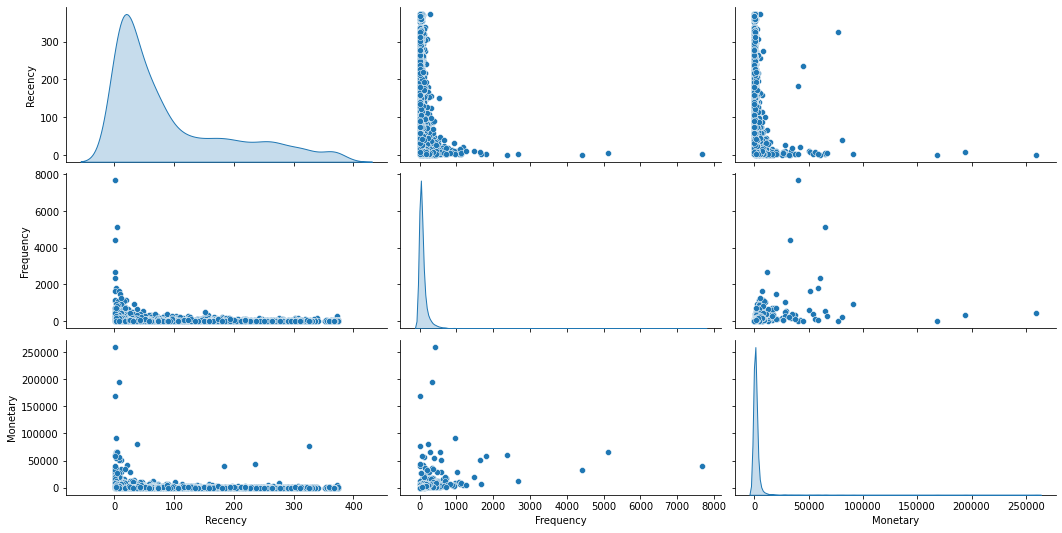

In [95]:
sns.pairplot(rfm_data, diag_kind="kde", aspect=2);

**We can see above the distributions are skewed.** As we require normally distributed data to perform K-means clustering we will apply log transformation to reduce skewness.

In [96]:
#log transformation
new_df = np.log(rfm_data)
new_df.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,5.786897,0.000000,11.253942
12747.0,1.098612,4.634729,8.341889
12748.0,0.000000,8.392310,10.405873
12749.0,1.386294,5.293305,8.316515
12820.0,1.386294,4.077537,6.848366


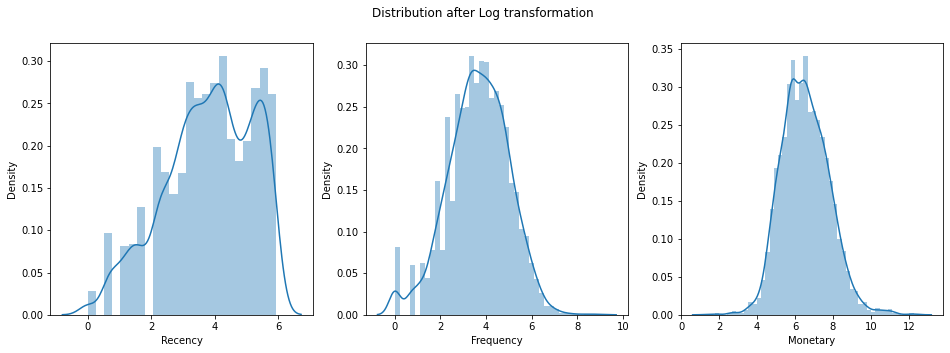

In [97]:
# checking distrubutions after log transformation
plt.figure(figsize=(16,5))

plt.subplot(1, 3, 1)
sns.distplot(new_df['Recency'])

plt.subplot(1, 3, 2)
sns.distplot(new_df['Frequency'])

plt.subplot(1, 3, 3)
sns.distplot(new_df['Monetary'])

plt.suptitle("Distribution after Log transformation")
plt.show()

**Scaling the data using StandardScaler**

In [98]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# normalizing data
norm_data = scaler.fit_transform(new_df)

# **K-means Clustering**

Clustering is an unsupervised classification techinque to understand the groups of classes in the data. We will use the K-means clustering algorithm to determine the ideal segments of customers.

### **Applying Elbow Method**

First, we will build multiple clusters on our RFM data and will try to find out the optimal number of clusters in our data using the **Elbow method**.

In [99]:
# sum of square distances
sum_of_sq_dist = {}

# fitting k-means
for k in range(1,21):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(norm_data)
    sum_of_sq_dist[k] = km.inertia_

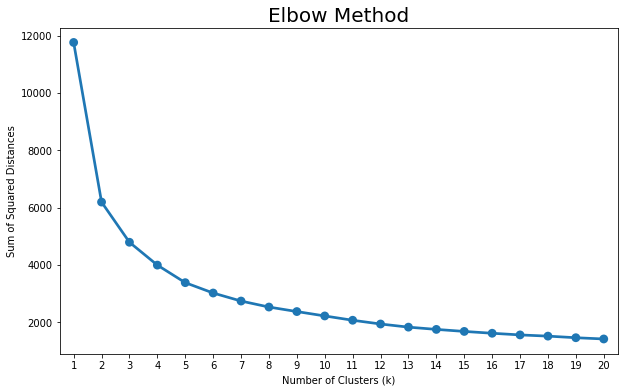

In [100]:
# plotting elbow method graph
plt.figure(figsize=(10,6))

sns.pointplot(x=list(sum_of_sq_dist.keys()), y=list(sum_of_sq_dist.values()))
plt.title('Elbow Method', fontsize=20)
plt.xlabel('Number of Clusters (k)'); 
plt.ylabel('Sum of Squared Distances')
plt.show()


As the number of clusters increases, the variance (within-cluster sum of squared distances) decreases. Here, we cannot see a very distinct elbow point. One might infer the optimal value of K to be 2, 3 or 4.

Taking calinski_harbasz score as the metric,


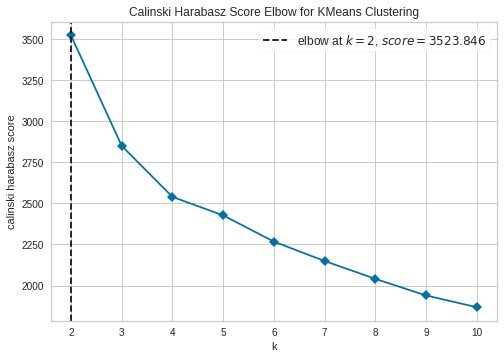

In [101]:
# taking calinski_harbasz score as the metric
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,11), metric='calinski_harabasz', timings=False
)

visualizer.fit(norm_data)        # Fit the data to the visualizer
visualizer.show()

> **From the above plot, we can see that the optimal number of clusters is 2.**

In [102]:
# using k=2
km = KMeans(n_clusters=2,max_iter=1000, random_state=1)
cluster_labels = km.fit_predict(norm_data)
print(cluster_labels)

[0 1 1 ... 0 1 1]


In [103]:
# assigning clusters
rfm_df['Cluster']=cluster_labels

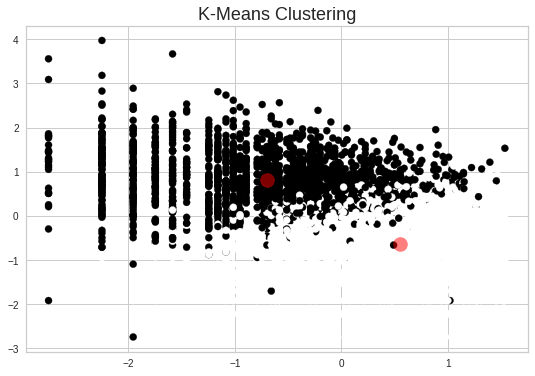

In [104]:
# visualizing clusters
plt.figure(figsize=(9,6))
plt.scatter(norm_data[:, 0], norm_data[:, 1], c=cluster_labels, s=50)
centers = km.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

plt.title('K-Means Clustering', fontsize=18)
plt.show()

## **Evaluation using Silhoutte method**

Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually.

**we will try clusters k= 2, 3 and 4 and check their silhouette coefficient.**

In [105]:
silhouette = []
for n_clusters in range(2,11):
    clusterer = KMeans(init='k-means++', n_clusters = n_clusters, n_init=100)
    preds = clusterer.fit_predict(norm_data)
    score = silhouette_score(norm_data, preds)
    silhouette.append(score)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", score)

For n_clusters = 2 The average silhouette_score is : 0.3959673538474021
For n_clusters = 3 The average silhouette_score is : 0.30390449065874375
For n_clusters = 4 The average silhouette_score is : 0.3019198260531211
For n_clusters = 5 The average silhouette_score is : 0.28067645698832233
For n_clusters = 6 The average silhouette_score is : 0.2750460249648783
For n_clusters = 7 The average silhouette_score is : 0.2641726208660911
For n_clusters = 8 The average silhouette_score is : 0.25973624647646887
For n_clusters = 9 The average silhouette_score is : 0.2657944487274359
For n_clusters = 10 The average silhouette_score is : 0.2680822086485416


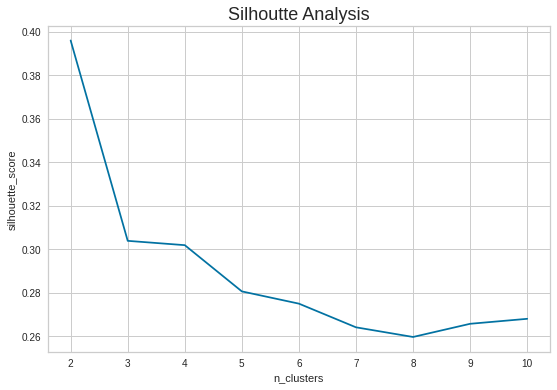

In [106]:
# plotting Silhoutte scores
plt.figure(figsize=(9,6))
n_clusters = [x for x in range(2,11)]
df_silhouette = pd.DataFrame({'n_clusters':n_clusters,'silhouette_score':silhouette})
sns.lineplot(data=df_silhouette, x="n_clusters", y="silhouette_score")
plt.title('Silhoutte Analysis', fontsize=18)
plt.show()

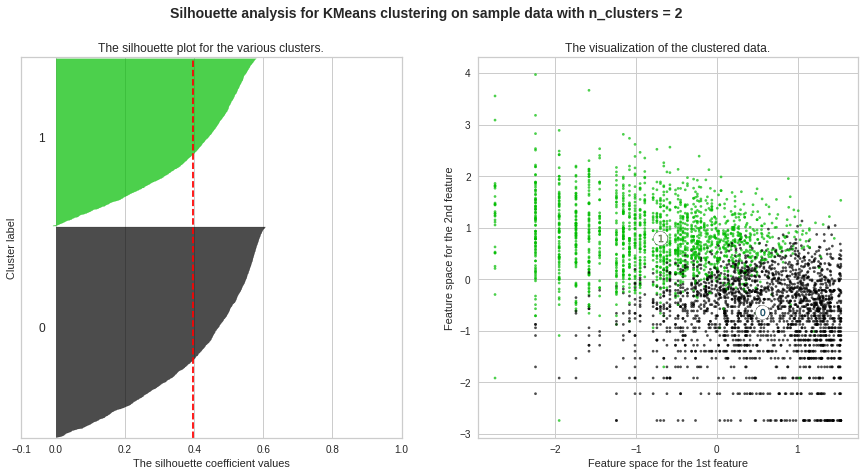

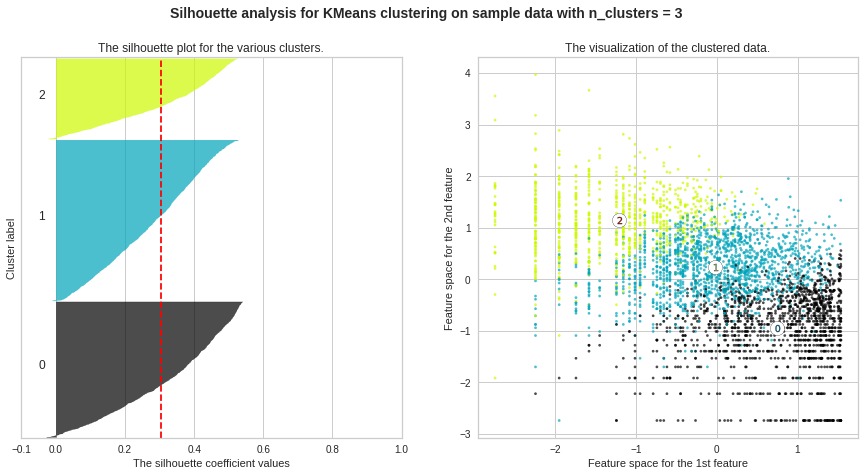

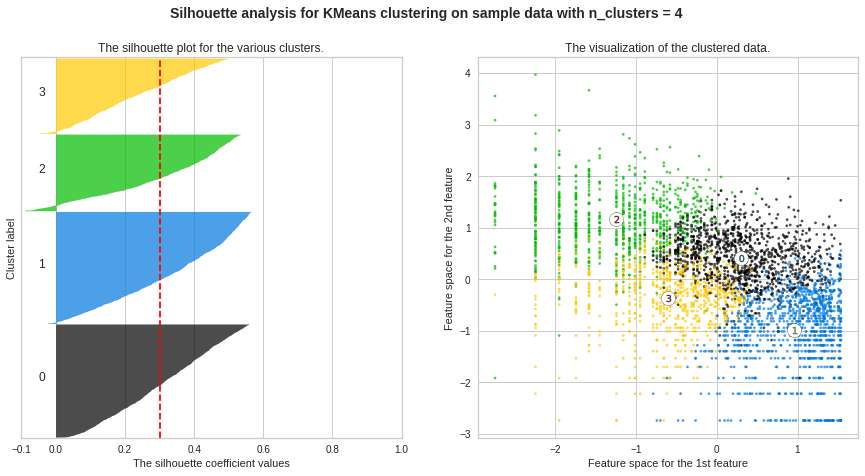

In [107]:
# plot silhoutte score
X = norm_data
range_n_clusters = [2,3,4]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(15, 7)

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()


> **The best silhouette score obtained is when the number of clusters is 2.**




## **Hierarchical Clustering**

Let’s first draw the dendrogram to help us decide the number of clusters

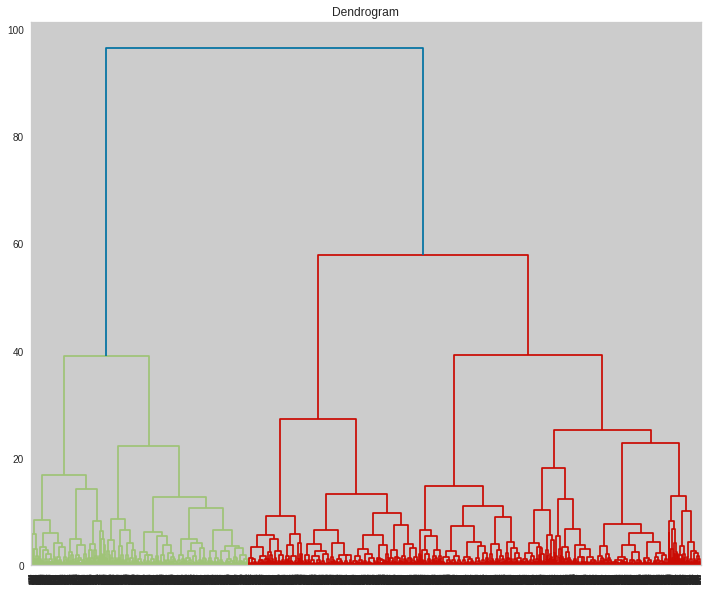

In [108]:
# dendrogram
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(12,10))
dend = shc.dendrogram(shc.linkage(norm_data, method='ward'))
plt.title("Dendrogram")  
plt.show()

The x-axis contains the samples and y-axis represents the distance between these samples. The vertical line with maximum distance is the blue line and hence we can decide a threshold of 70.

We have two clusters. Let’s now apply hierarchical clustering for 2 clusters

In [109]:
# Fitting hierarchical clustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(norm_data)

array([0, 1, 1, ..., 0, 1, 0])

In [110]:
# assigning hierarchical clusters
rfm_df['HR_labels']=cluster.labels_

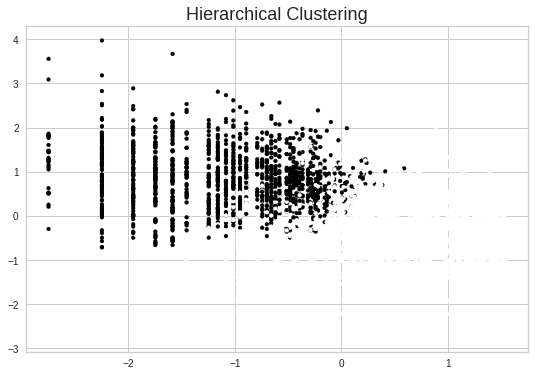

In [111]:
# Plotting resulting clusters
plt.figure(figsize=(9,6))
plt.scatter(X[:, 0], X[:, 1],c=rfm_df['HR_labels'],s=15)

plt.title('Hierarchical Clustering', fontsize=18)
plt.show()



> **We can see that ,Customers are well separate when we use Hierarchical clustering and number of clusters equal to 2**



# **DBSCAN**

DBSCAN stands for Density-Based Spatial Clustering of Applications with Noise.

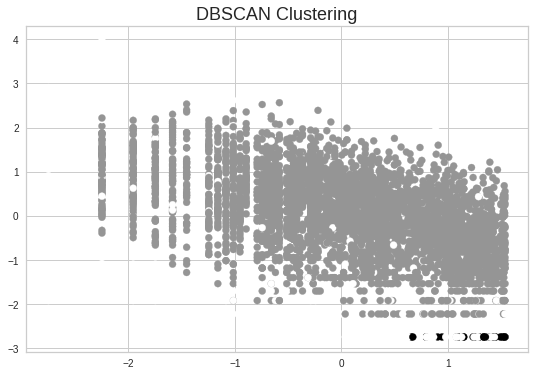

In [112]:
# fitting DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=15)
y_pred = dbscan.fit_predict(norm_data)

# Plotting resulting clusters
plt.figure(figsize=(9,6))
plt.scatter(norm_data[:, 0], norm_data[:, 1],c=y_pred)
plt.title('DBSCAN Clustering',fontsize=18)
plt.show()

There is noise in the model. Therefore, we need to find the value of epsilon and then train our model again.

**For epsilon, We will be using K-NearestNeighbors**

In [113]:
# finding optimum value of epsilon
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(norm_data)
distances, indices = nbrs.kneighbors(norm_data)

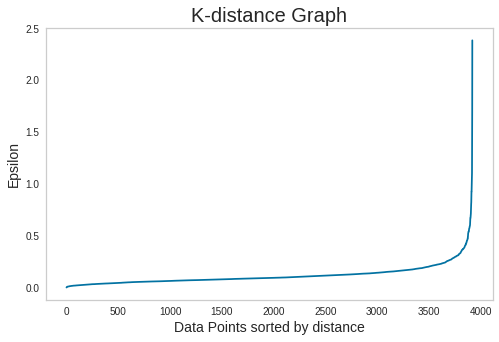

In [114]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(8,5))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.grid()
plt.show()

The optimum value of epsilon is at the point of maximum curvature in the K-Distance Graph, which is 0.4 in this case.

In [115]:
from sklearn.cluster import DBSCAN
dbscan_opt=DBSCAN(eps=0.4,min_samples=15)
dbscan_opt.fit(X)

DBSCAN(eps=0.4, min_samples=15)

In [116]:
rfm_df['DBSCAN_opt_labels']=dbscan_opt.labels_
rfm_df['DBSCAN_opt_labels'].value_counts()

 0    3503
-1     395
 1      22
Name: DBSCAN_opt_labels, dtype: int64

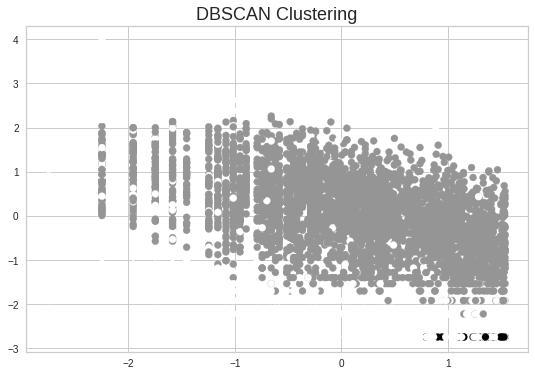

In [117]:
y_pred_opt=dbscan_opt.fit_predict(norm_data)

# Plotting resulting clusters
plt.figure(figsize=(9,6))
plt.scatter(norm_data[:, 0], norm_data[:, 1],c=y_pred_opt)
plt.title('DBSCAN Clustering',fontsize=18)
plt.show()

> **The most amazing thing about DBSCAN is that it separates noise from the dataset pretty well. Here, 0 and 1 are the two different clusters, and -1 is the noise.**

# **Result**

In [118]:
rfm_df.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_score,Segment,Cluster,HR_labels,DBSCAN_opt_labels
CustomerID,,,,,,,,,,,,
12346.0,326,1,77183.60,1,1,4,114,6,Average,0,0,-1
12747.0,3,103,4196.01,4,4,4,444,12,High,1,1,0
12748.0,1,4413,33053.19,4,4,4,444,12,High,1,1,-1
12749.0,4,199,4090.88,4,4,4,444,12,High,1,1,0
12820.0,4,59,942.34,4,3,3,433,10,High,1,1,0


In [119]:
# Calculate average RFM values and size for each Segment
segment_summary = rfm_df.groupby(['Segment']).agg({'Recency': 'mean',
                                                    'Frequency': 'mean',
                                                    'Monetary': 'mean',}).round(0)

segment_summary

,Recency,Frequency,Monetary
Segment,,,
Average,100.0,35.0,694.0
High,27.0,186.0,3931.0
Low,217.0,11.0,194.0


From RFM analysis, we manually created three clusters on quartile basis as High, averarge and low value customers.



In [120]:
# Calculate average RFM values and size for each cluster
cluster_summary = rfm_df.groupby(['Cluster']).agg({'Recency': 'mean',
                                                    'Frequency': 'mean',
                                                    'Monetary': 'mean',}).round(0)

cluster_summary

,Recency,Frequency,Monetary
Cluster,,,
0,142.0,24.0,451.0
1,31.0,170.0,3625.0


After performing K-means clustering and finding optimal value of clusters as k=2 using elbow method and silhoutte score we assigned the clusters to our RFM data.

We can observe following clusters of customers:

**Wholesalers** - 'Cluster 1' is the high value customer segment as the customers in this group has least mean recency with high mean frequency. They are also the ones who have high mean monetary value.

**Average Customers** - It is quite evident that 'Cluster 0' has customers who rarely shop i.e mean recency is 142 days and when they order, their orders are pretty low valued. 

Apart from the numbers, the visualization of clusters in Silhouette Analysis show that both customer segments are quite distinct with very little overlap between them.



In [121]:
# Calculate average RFM values and size for each HR_labels
HR_labels_summary = rfm_df.groupby(['HR_labels']).agg({'Recency': 'mean',
                                                    'Frequency': 'mean',
                                                    'Monetary': 'mean',}).round(0)

HR_labels_summary

,Recency,Frequency,Monetary
HR_labels,,,
0,130.0,41.0,833.0
1,16.0,189.0,3993.0


The dendrogram also depicted the number of clusters as 2. We saw in Hierarchical clustering the customers were well grouped using 2 clusters. Looking at the above summary we can observe the same as K-means clustering. Here, mean renency for both clusters have decreased whereas mean frequency and monetary have increased as compared to K-means clustering.

**Wholesale Customers** - 'Cluster 1' is the high value customer segment as the customers in this group place the highest value orders with a very high relative frequency than other members. They are also the ones who have transacted the most recently. These are the wholesale customers of the retail store.

**Average Customers** - 'Cluster 0' is the average customer segment. These customers order less frequent than the wholesale customers and their orders are pretty low valued.

# **Conclusion**

* From RFM analysis, we manually created three clusters on a quartile basis as high, average and low value customers.
* In K-means clustering, using the elbow method we got the optimal value of clusters as 2. Also, the best silhouette score obtained is when the number of clusters is 2.
* In Hierarchical clustering, the dendrogram also depicted the number of clusters as 2. We saw in Hierarchical clustering the customers were well grouped using 2 clusters.
* DBSCAN gave us three clusters 0 and 1 the two different clusters, and -1 as the noise which was more.

Two customer segments have been formed such as

**Wholesale Customers -** The high value customer segment as the customers in this group place the highest value orders with a very high relative frequency and also transacted most recently.

**Average Customers -** The average customer segment. These customers order less frequent than the wholesale customers and their orders are pretty low valued and also rarely shop.

We can conclude that K-means clustering and Hierarchical clustering can be used for this dataset to segment customers based on RFM analysis.
